In [44]:
import pandas as pd
import numpy as np

In [45]:
df =pd.read_excel('Airlines+Data.xlsx')
df.head()


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [46]:
df.shape

(96, 2)

# Time Series Analysis

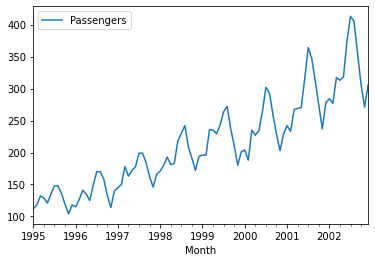

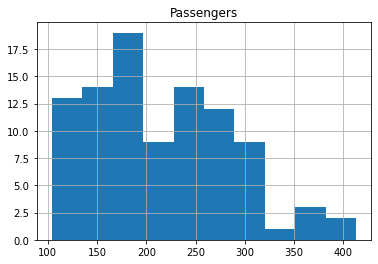

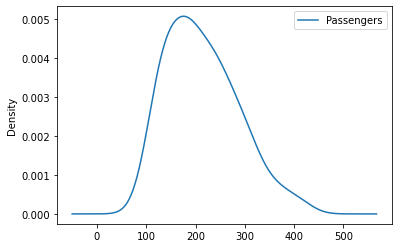

In [34]:
from matplotlib import pyplot
df =pd.read_excel('Airlines+Data.xlsx',header = 0,index_col = 0,parse_dates =True)
df.plot()
df.hist()
df.plot(kind ='kde')
pyplot.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9536\3446337163.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_excel('Airlines+Data.xlsx', header=0,index_col=0,parse_dates=True, squeeze=True)


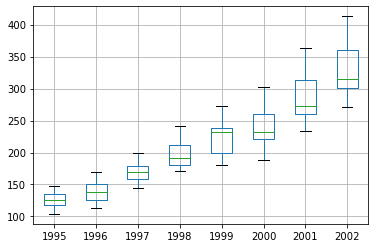

In [15]:
# create a boxplot of yearly data
#pandas.Grouper function (*args, **kwargs) : A Grouper allows the user to specify a groupby instruction for an object.

from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = pd.read_excel('Airlines+Data.xlsx', header=0,index_col=0,parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

# Handling missing values

<AxesSubplot:xlabel='Month'>

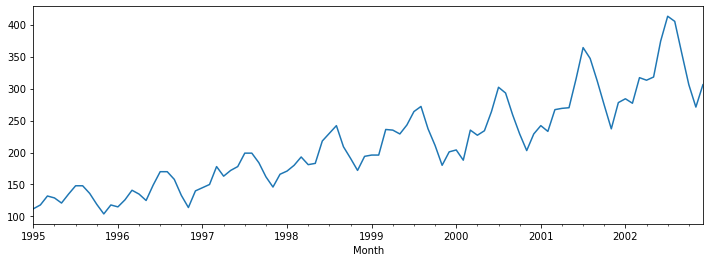

In [17]:
#Mean inputation

df = df.assign(Passengers_Mean_imputation = df['Passengers'].fillna(df['Passengers'].mean()))
df['Passengers_Mean_imputation'].plot(figsize=(12,4))

In [18]:
#Linear interpolation

df = df.assign(Passengers_Linear_Interpolation = df['Passengers'].interpolate(method='linear'))
df.head()

,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
Month,,,
1995-01-01,112,112,112
1995-02-01,118,118,118
1995-03-01,132,132,132
1995-04-01,129,129,129
1995-05-01,121,121,121


<AxesSubplot:xlabel='Month'>

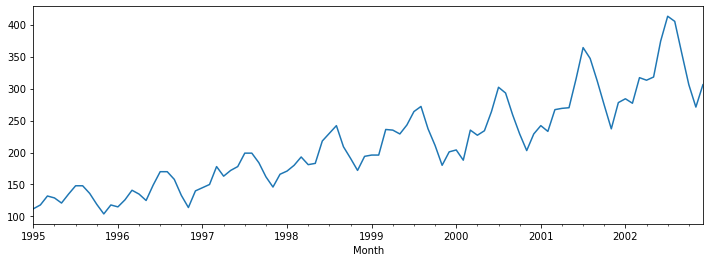

In [19]:
df['Passengers_Linear_Interpolation'].plot(figsize=(12,4))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


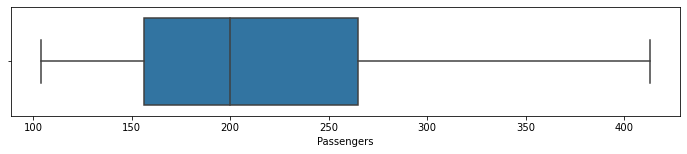

In [24]:
#Box plot and interquartile range
import seaborn as sns

fig = pyplot.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1.5)

In [ ]:
#whis=1.5
#1st quartile = 155
#3rd quartile = 270
#Quartile range = (3rd quartile - 1st quartile) = 270-155 = 115

#*Whisker on the upper side*

#3rd quartile + (Quartile range * whis) = 270 + (115 * 1.5) = 270 + 172 = 442
#There is no outliers above the whisker 442.

# Time series decomposition

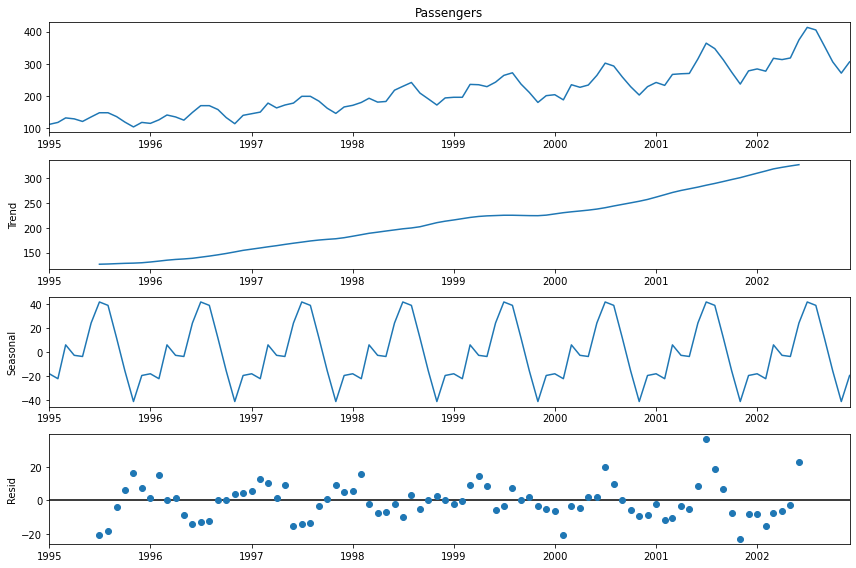

In [36]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
fig = decomposition.plot()
pyplot.show()

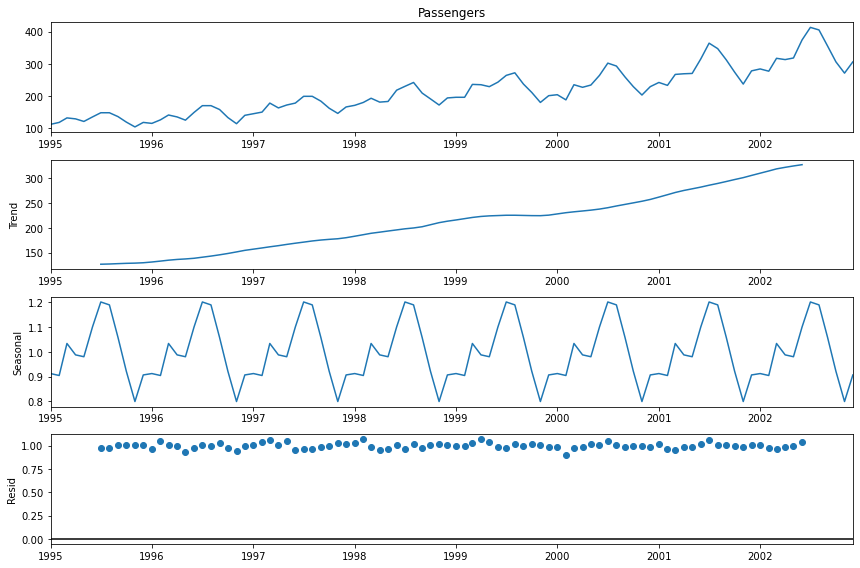

In [37]:
# Multiplicative seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative')
fig = decomposition.plot()
pyplot.show()

# Build and Evaluate time series forecast

In [47]:
train_len = 80
train = df[0:train_len]
# 1959 and 1960 data
test = df[train_len:]

In [53]:
train.shape

(80, 2)

In [56]:
train.tail()

,Month,Passengers
75,2001-04-01,269
76,2001-05-01,270
77,2001-06-01,315
78,2001-07-01,364
79,2001-08-01,347


# Naive method

In [57]:
# Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284


In [58]:
# Assigning the last value of the train set (December 1958 value) to all the test data records
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [59]:
y_hat_naive.head()

,Month,Passengers,naive_forecast
80,2001-09-01,312,347
81,2001-10-01,274,347
82,2001-11-01,237,347
83,2001-12-01,278,347
84,2002-01-01,284,347


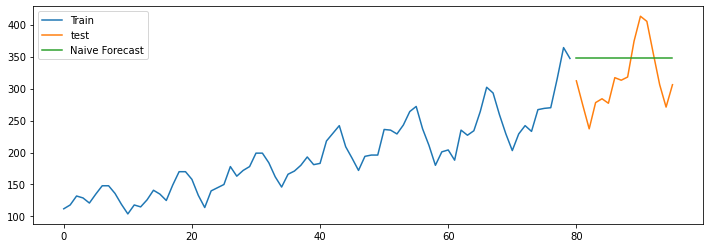

In [62]:
pyplot.figure(figsize=(12,4))
pyplot.plot(train['Passengers'], label='Train')
pyplot.plot(test['Passengers'], label='test')
pyplot.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
pyplot.legend(loc='best')
pyplot.show()

# Simple average method

In [ ]:
# Simple average method is Forecast = Average of all past months’ data
#Average of all the train data values assigned to the test data.

In [64]:
y_hat_avg = test.copy()

In [65]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [67]:
y_hat_avg.head()

,Month,Passengers,avg_forecast
80,2001-09-01,312,193.45
81,2001-10-01,274,193.45
82,2001-11-01,237,193.45
83,2001-12-01,278,193.45
84,2002-01-01,284,193.45


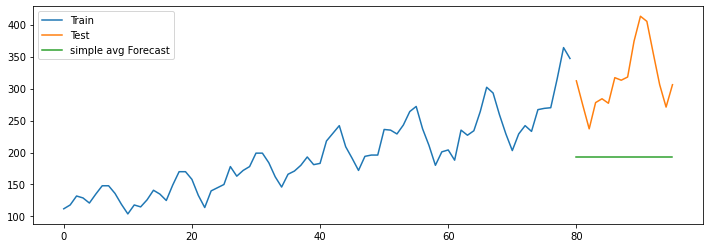

In [70]:
# Plotting train, test and forecast

pyplot.figure(figsize =(12,4))
pyplot.plot(train['Passengers'],label = 'Train')
pyplot.plot(test['Passengers'],label ='Test')
pyplot.plot(y_hat_avg['avg_forecast'], label ='simple avg Forecast')
pyplot.legend(loc ='best')
pyplot.show()

# Calculate RMSE and MAPE Error

In [72]:
from sklearn.metrics import mean_squared_error

In [74]:
#Root Mean Square Error is the measure of how well a regression line fits the data points. 
#RMSE can also be construed as Standard Deviation in the residuals. 

rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

57.46

In [75]:
# MAPE (Mean absolute percentage error)
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape

17.54

In [76]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54


In [ ]:
#MAPE is the percentage of error.

#So, we can see that we are 83% accurate to forecast.

# Error for Simple average method

In [81]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
rmse

130.58

In [82]:
#MAPE
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape

37.25

In [83]:
results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

C:\Users\Admin\AppData\Local\Temp\ipykernel_9536\1234772339.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)


,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25


In [ ]:
#We can see that both RMSE and MAPE errors have increased with teh Simple average method.
#Accuracy = 1 - MAPE